In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("student_clustering.csv")
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


# Create Scatter Plot:-

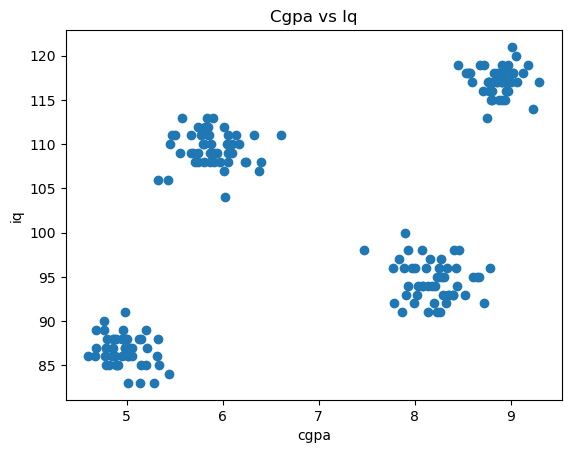

In [3]:
plt.scatter(df["cgpa"], df["iq"])
plt.xlabel("cgpa")
plt.ylabel("iq")
plt.title("Cgpa vs Iq")
plt.show()

# Apply KMeans Clustering WithOut Scalling:-

In [4]:
from sklearn.cluster import KMeans

In [5]:
inert = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df[["cgpa","iq"]])
    inert.append(km.inertia_)

In [6]:
inert

[29957.898288,
 4184.14127,
 2362.7133489999997,
 681.96966,
 523.7131894763966,
 395.9605877691832,
 312.17121459855684,
 241.70118319588107,
 211.48047067473587,
 171.40590752168498]

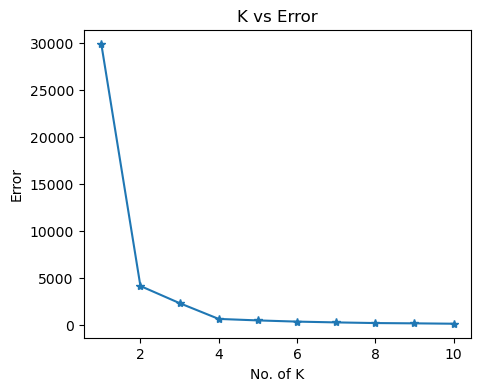

In [7]:
plt.figure(figsize=(5,4))
plt.xlabel("No. of K")
plt.ylabel("Error")
plt.title("K vs Error")
plt.plot(range(1,11), inert, marker = "*")
plt.show()

In [8]:
model = KMeans(n_clusters=4)

In [9]:
model.fit(df[["cgpa","iq"]])

KMeans(n_clusters=4)

In [10]:
y_pred = model.predict(df[["cgpa","iq"]])
y_pred

array([2, 1, 0, 0, 1, 1, 0, 3, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 2, 3, 0, 1, 3, 1, 3, 1, 0, 0, 3, 1, 2, 1, 2, 0, 0, 2,
       3, 3, 0, 1, 3, 1, 2, 2, 3, 0, 3, 1, 1, 3, 1, 3, 1, 0, 0, 3, 2, 3,
       0, 2, 1, 0, 1, 3, 0, 2, 1, 3, 1, 3, 2, 0, 0, 3, 1, 2, 3, 2, 3, 1,
       3, 1, 3, 3, 0, 2, 0, 0, 3, 0, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 3, 3,
       0, 3, 1, 1, 0, 3, 0, 1, 3, 2, 2, 1, 0, 3, 0, 2, 0, 1, 2, 0, 0, 1,
       2, 2, 1, 3, 1, 2, 0, 0, 0, 2, 1, 2, 2, 3, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 0, 1, 3, 1, 0, 2, 3, 1, 0, 3, 2, 1, 2, 2, 3, 3, 1, 3, 2, 2, 0,
       3, 1, 2, 3, 3, 1, 1, 1, 0, 2, 0, 0, 3, 1, 0, 0, 2, 2, 0, 2, 3, 1,
       1, 3])

In [11]:
new_df = df.copy()

In [12]:
new_df["cluster"] = y_pred

In [13]:
new_df

,cgpa,iq,cluster
0,5.13,88,2
1,5.90,113,1
2,8.36,93,0
3,8.27,97,0
4,5.45,110,1
...,...,...,...
195,4.68,89,2
196,8.57,118,3
197,5.85,112,1
198,6.23,108,1


In [14]:
cent = model.cluster_centers_
cent

array([[  8.1998,  94.6   ],
       [  5.8948, 109.52  ],
       [  4.9676,  86.7   ],
       [  8.8714, 117.16  ]])

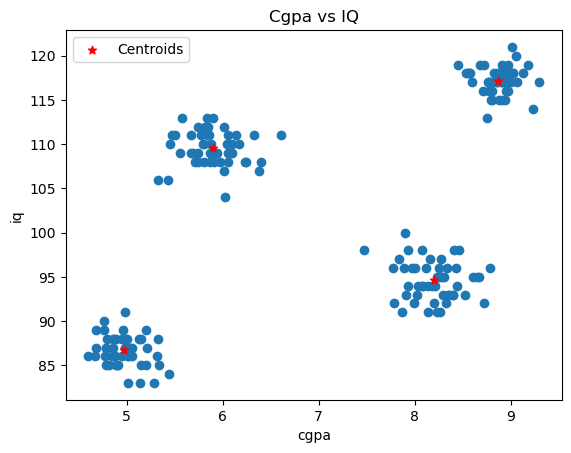

In [15]:
plt.scatter(df["cgpa"], df["iq"])
plt.scatter(cent[:, 0], cent[:, 1], color = "red", label = "Centroids",marker="*")
plt.xlabel("cgpa")
plt.ylabel("iq")
plt.title("Cgpa vs IQ")
plt.legend()
plt.show()

# Group wise draw scatter plot:-

In [16]:
a = new_df[new_df["cluster"]==0]
b = new_df[new_df["cluster"]==1]
c = new_df[new_df["cluster"]==2]
d = new_df[new_df["cluster"]==3]

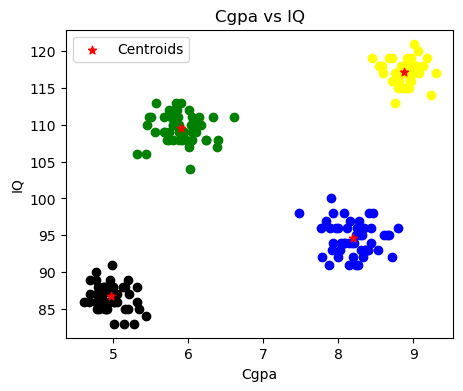

In [17]:
plt.figure(figsize=(5,4))
plt.scatter(a["cgpa"], a["iq"], color = "blue")
plt.scatter(b["cgpa"], b["iq"], color = "green")
plt.scatter(c["cgpa"], c["iq"], color = "black")
plt.scatter(d["cgpa"], d["iq"], color = "yellow")
plt.scatter(cent[:, 0], cent[:, 1], color = "red", label = "Centroids", marker="*")
plt.xlabel("Cgpa")
plt.ylabel("IQ")
plt.title("Cgpa vs IQ")
plt.legend()
plt.show()

# Apply KMeans Clustering With MinMaxScaler Scalling:-

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scale = MinMaxScaler()

In [20]:
scale.fit(df[["cgpa"]])
df["cgpa"] = scale.transform(df[["cgpa"]])

In [21]:
scale.fit(df[["iq"]])
df["iq"] = scale.transform(df[["iq"]])

In [22]:
df.head()

,cgpa,iq
0,0.112766,0.131579
1,0.276596,0.789474
2,0.800000,0.263158
3,0.780851,0.368421
4,0.180851,0.710526


# draw scatter plot:-

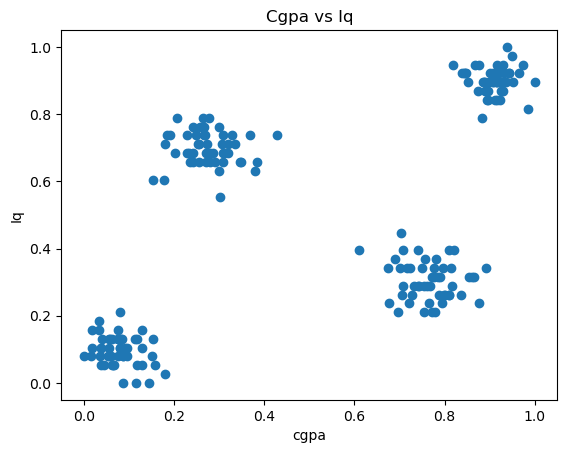

In [23]:
plt.scatter(df["cgpa"], df["iq"])
plt.xlabel("cgpa")
plt.ylabel("Iq")
plt.title("Cgpa vs Iq")
plt.show()

In [24]:
model2 = KMeans(n_clusters=4)

In [25]:
model2.fit(df[["cgpa", "iq"]])

KMeans(n_clusters=4)

In [26]:
y_pred2 = model2.predict(df[["cgpa", "iq"]])
y_pred2

array([2, 1, 0, 0, 1, 1, 0, 3, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2,
       0, 2, 2, 0, 2, 3, 0, 1, 3, 1, 3, 1, 0, 0, 3, 1, 2, 1, 2, 0, 0, 2,
       3, 3, 0, 1, 3, 1, 2, 2, 3, 0, 3, 1, 1, 3, 1, 3, 1, 0, 0, 3, 2, 3,
       0, 2, 1, 0, 1, 3, 0, 2, 1, 3, 1, 3, 2, 0, 0, 3, 1, 2, 3, 2, 3, 1,
       3, 1, 3, 3, 0, 2, 0, 0, 3, 0, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 3, 3,
       0, 3, 1, 1, 0, 3, 0, 1, 3, 2, 2, 1, 0, 3, 0, 2, 0, 1, 2, 0, 0, 1,
       2, 2, 1, 3, 1, 2, 0, 0, 0, 2, 1, 2, 2, 3, 2, 3, 1, 2, 3, 2, 3, 3,
       2, 0, 1, 3, 1, 0, 2, 3, 1, 0, 3, 2, 1, 2, 2, 3, 3, 1, 3, 2, 2, 0,
       3, 1, 2, 3, 3, 1, 1, 1, 0, 2, 0, 0, 3, 1, 0, 0, 2, 2, 0, 2, 3, 1,
       1, 3])

In [27]:
df["Clusters"] = y_pred2

In [28]:
df.head()

,cgpa,iq,Clusters
0,0.112766,0.131579,2
1,0.276596,0.789474,1
2,0.800000,0.263158,0
3,0.780851,0.368421,0
4,0.180851,0.710526,1


# find cluster centriod:-

In [29]:
cent_new = model2.cluster_centers_
cent_new

array([[0.76591489, 0.30526316],
       [0.27548936, 0.69789474],
       [0.07821277, 0.09736842],
       [0.90880851, 0.89894737]])

# Group wise draw scatter plot:-

In [30]:
a = df[df["Clusters"]==0]
b = df[df["Clusters"]==1]
c = df[df["Clusters"]==2]
d = df[df["Clusters"]==3]

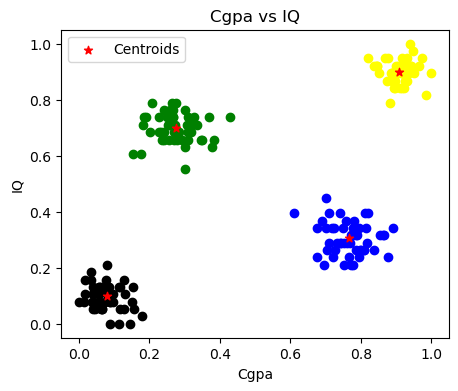

In [31]:
plt.figure(figsize=(5,4))
plt.scatter(a["cgpa"], a["iq"], color = "blue")
plt.scatter(b["cgpa"], b["iq"], color = "green")
plt.scatter(c["cgpa"], c["iq"], color = "black")
plt.scatter(d["cgpa"], d["iq"], color = "yellow")
plt.scatter(cent_new[:, 0], cent_new[:, 1], color = "red", label = "Centroids", marker="*")
plt.xlabel("Cgpa")
plt.ylabel("IQ")
plt.title("Cgpa vs IQ")
plt.legend()
plt.show()